In [13]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [47]:
import numpy as np
import pyedflib
import connectivipy
import utils as ut

In [52]:
import utils as ut

# Read the files
eo = ut.read_file("data/S072R01.edf")
ec = ut.read_file("data/S072R01.edf")

######## 1.1

fs = 160 # Frequency of sampling, given by data
resolution = 100 # Resolution of model (s.t. each bin has 1Hz of width)
freq = 10 # Frequency of interest
density = 0.2 # Density of the graph desired


###PDC

# Fitting models
eo_pdc = ut.fit_model(eo, fs, resolution, "pdc", freq)
ec_pdc = ut.fit_model(ec, fs, resolution, "pdc", freq)

# Adjacency Matrices
ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,density), "networks/eo_pdc_20.npy")
ut.adjacency_matrix(ec_pdc, ut.find_threshold(ec_pdc,density), "networks/ec_pdc_20.npy")


#TODO: Graphical representation of the adjacency matrices

######## 1.2


# Fitting models
eo_dtf = ut.fit_model(eo, fs, resolution, "dtf", freq)
ec_dtf = ut.fit_model(ec, fs, resolution, "dtf", freq)

# Adjacency Matrices
ut.adjacency_matrix(eo_dtf, ut.find_threshold(eo_dtf,density), "networks/eo_dtf_20.npy")
ut.adjacency_matrix(ec_dtf, ut.find_threshold(ec_dtf,density), "networks/ec_dtf_20.npy")



#TODO: Graphical representation of the adjacency matrices

######## 1.3

densities = [0.01,0.05,0.1,0.3,0.5] #Different thresholds

#Names for files
eo_pdc_names = ["networks/eo_pdc_01.npy", "networks/eo_pdc_05.npy", "networks/eo_pdc_10.npy", "networks/eo_pdc_30.npy", "networks/eo_pdc_50.npy"]
ec_pdc_names = ["networks/ec_pdc_01.npy", "networks/ec_pdc_05.npy", "networks/ec_pdc_10.npy", "networks/ec_pdc_30.npy", "networks/ec_pdc_50.npy"]
eo_dtf_names = ["networks/eo_dtf_01.npy", "networks/eo_dtf_05.npy", "networks/eo_dtf_10.npy", "networks/eo_dtf_30.npy", "networks/eo_dtf_50.npy"]
ec_dtf_names = ["networks/ec_dtf_01.npy", "networks/ec_dtf_05.npy", "networks/ec_dtf_10.npy", "networks/ec_dtf_30.npy", "networks/ec_dtf_50.npy"]


###PDC

eo_pdc_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,x[0]), x[1]), zip(densities,eo_pdc_names)))
eo_pdc_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,x[0]), x[1]), zip(densities,ec_pdc_names)))


###DTF

eo_pdc_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,x[0]), x[1]), zip(densities,eo_dtf_names)))
eo_pdc_networks = list(map(lambda x: ut.adjacency_matrix(eo_pdc, ut.find_threshold(eo_pdc,x[0]), x[1]), zip(densities,ec_dtf_names)))



######## 1.4


channels = ["Fp1", "Fp2", "F7", "F3", "Fz", "F4", "F8", "T7", "C3", "Cz", "C4", "T8", "P7", "P3", "Pz", "P4", "P8", "O1", "O2"]

small_eo = ut.read_file("data/S072R01.edf", channels = channels)
small_ec = ut.read_file("data/S072R02.edf", channels = channels)

mod = ut.fit_model(small_eo, fs, resolution, "pdc", freq)

#TODO: check bootstrap for connectivipy



######## 1.5

small_eo_pdc = ut.adjacency_matrix(mod, ut.find_threshold(mod,density))

#TODO: ask for the right channel locations!


######## 1.6

alternative_frequency = 20

###PDC

# Fitting models
alt_eo_pdc = ut.fit_model(eo, fs, resolution, "pdc", alternative_frequency)
alt_ec_pdc = ut.fit_model(ec, fs, resolution, "pdc", alternative_frequency)

# Adjacency Matrices
ut.adjacency_matrix(eo_pdc, ut.find_threshold(alt_eo_pdc,density), "networks/alt_eo_pdc_20.npy")
ut.adjacency_matrix(ec_pdc, ut.find_threshold(alt_ec_pdc,density), "networks/alt_ec_pdc_20.npy")


#TODO: CHeck if alternative frequency is correct

In [18]:
##### 1.1 and 1.2

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

def create_graph_image(G_ec, name):
    # Eyes close  - PDC
    for node in G_ec.nodes():
        G_ec.node[node]['node_size'] = G_ec.degree(node)*100
        G_ec.node[node]['label'] = node

    plt.figure(num=None, figsize=(15,15), dpi=50)
    nx.draw(G_ec, node_shape= 'o', node_size=list(nx.get_node_attributes(G_ec,'node_size').values()),
           cmap=plt.cm.autumn_r, node_color=range(64), labels=nx.get_node_attributes(G_ec,'label'))
    plt.title(name, fontsize=25)
    #plt.show() 
    plt.savefig(name + '.png', bbox_inches='tight')
    

### pdc
# Graphical representation of the adjacency matrices
adj_eo_pdc = np.load('networks/eo_pdc_20.npy')
G_eo_pdc=nx.from_numpy_matrix(adj_eo_pdc, create_using=nx.MultiDiGraph())
create_graph_image(G_eo_pdc, 'eo_pdc_graph')

adj_ec_pdc = np.load('networks/ec_pdc_20.npy')
G_ec_pdc=nx.from_numpy_matrix(adj_ec_pdc, create_using=nx.MultiDiGraph())
create_graph_image(G_ec_pdc, 'ec_pdc_graph')


### dtf 
adj_eo_dtf = np.load('networks/eo_dtf_20.npy')
G_eo_dtf = nx.from_numpy_matrix(adj_eo_dtf, create_using=nx.MultiDiGraph())
create_graph_image(G_eo_dtf, 'eo_dtf_graph')

adj_ec_dtf = np.load('networks/ec_dtf_20.npy')
G_ec_dtf = nx.from_numpy_matrix(adj_ec_dtf, create_using=nx.MultiDiGraph())
create_graph_image(G_ec_dtf, 'ec_dtf_graph')

/Users/silvia/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/silvia/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/silvia/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/silvia/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

/Users/silvia/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/Users/silvia/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/Users/silvia/anaconda3/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/Users/silvia/anaconda3/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.ho

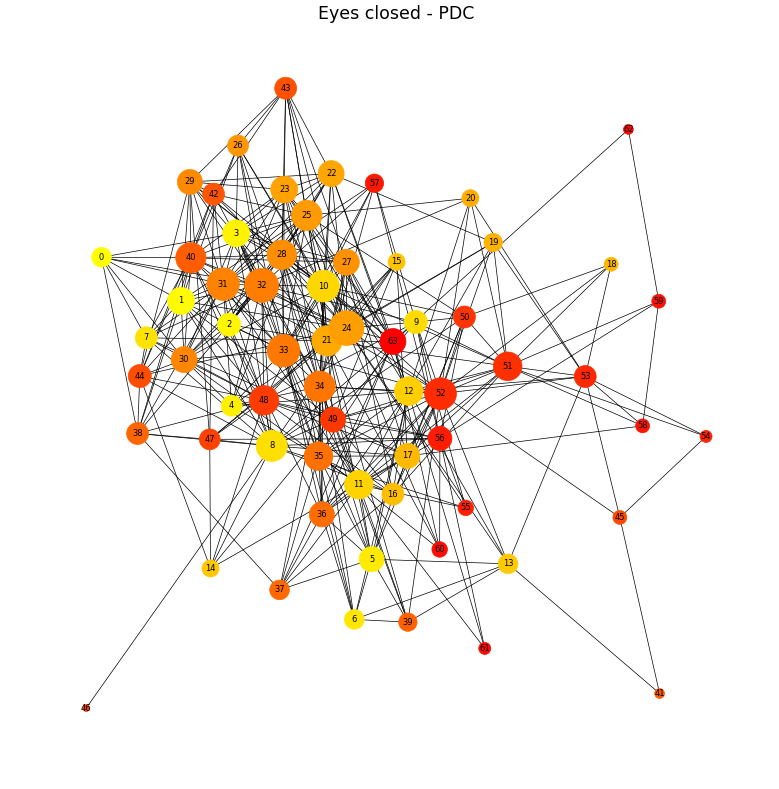

In [187]:
# Eyes close  - PDC
for node in G_ec.nodes():
    G_ec.node[node]['node_size'] = G_ec.degree(node)*100
    G_ec.node[node]['label'] = node

plt.figure(num=None, figsize=(15,15), dpi=50)
nx.draw(G_ec, node_shape= 'o', node_size=list(nx.get_node_attributes(G_ec,'node_size').values()),
       cmap=plt.cm.autumn_r, node_color=range(64), labels=nx.get_node_attributes(G_ec,'label'))
plt.title('Eyes closed - PDC', fontsize=25)
plt.show() 
#plt.savefig('ec_pdc.png')

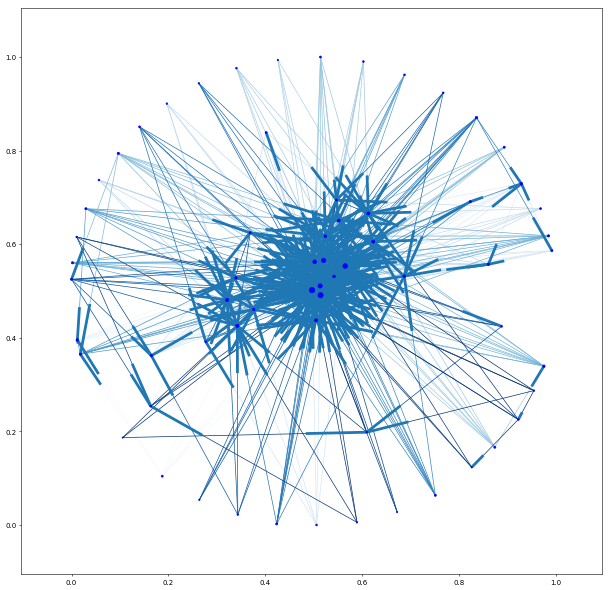

In [42]:
#G = nx.generators.directed.random_k_out_graph(10, 3, 0.5)
G = G_ec_dtf
pos = nx.layout.spring_layout(G)

plt.figure(num=None, figsize=(15,15), dpi=50)

#node_sizes = [3 + 10 * i for i in range(len(G))]
node_sizes = [G.degree(node) for node in G.nodes()]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
#edge_alphas = [(5 + i) / (M + 4) for i in range(M)]

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='blue')
edges = nx.draw_networkx_edges(G, pos, node_size=node_sizes, arrowstyle='->',
                               arrowsize=1, edge_color=edge_colors,
                               edge_cmap=plt.cm.Blues, width=1)

plt.show()

### Part2

**PDC**

In [ ]:
## global CC (slide 41) 

## average path length (slide 30)

## degree (number of neighbors)

- Per global CC serve UNdirected
- in/out degree serve directed 
- small world serve UNdirected
- per small world networkx va aggiornato ma cambiano alcune cose
- le matrici eo e ec sono uguali sia per PDC che per DTF 

In [46]:
import operator
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# pdc
adj_eo_pdc = np.load('networks/eo_pdc_20.npy')
G_eo_pdc_dir =nx.from_numpy_matrix(adj_eo_pdc, create_using=nx.MultiDiGraph())
G_eo_pdc =nx.from_numpy_matrix(adj_eo_pdc)

adj_ec_pdc = np.load('networks/ec_pdc_20.npy')
G_ec_pdc_dir =nx.from_numpy_matrix(adj_ec_pdc, create_using=nx.MultiDiGraph())
G_ec_pdc=nx.from_numpy_matrix(adj_ec_pdc)

# dtf
adj_eo_dtf = np.load('networks/eo_dtf_20.npy')
G_eo_dtf_dir =nx.from_numpy_matrix(adj_eo_dtf, create_using=nx.MultiDiGraph())
G_eo_dtf =nx.from_numpy_matrix(adj_eo_dtf)

adj_ec_dtf = np.load('networks/ec_dtf_20.npy')
G_ec_dtf_dir =nx.from_numpy_matrix(adj_ec_dtf, create_using=nx.MultiDiGraph())
G_ec_dtf=nx.from_numpy_matrix(adj_ec_dtf)

######## 2.1

### GLOBAL INDICES 

# Clustering Coefficient

# pdc
CC_eo_pdc = nx.average_clustering(G_eo_pdc)
CC_ec_pdc = nx.average_clustering(G_ec_pdc)

# dtf
CC_eo_dtf = nx.average_clustering(G_eo_dtf)
CC_ec_dtf = nx.average_clustering(G_ec_dtf)



## average shortest path length
# pdc
avg_path_eo_pdc = nx.average_shortest_path_length(G_eo_pdc)
avg_path_ec_pdc = nx.average_shortest_path_length(G_ec_pdc)

# dtf
avg_path_eo_dtf = nx.average_shortest_path_length(G_eo_dtf)
avg_path_ec_dtf = nx.average_shortest_path_length(G_ec_dtf)


### LOCAL INDICES 

## degree 

# pdc
#sorted(G_eo_pdc.degree().items(), reverse=True, key=operator.itemgetter(1))[:10]
degree_10_eo_pdc = sorted(list(G_eo_pdc.degree), reverse=True, key=operator.itemgetter(1))[:10]
degree_10_ec_pdc = sorted(list(G_ec_pdc.degree), reverse=True, key=operator.itemgetter(1))[:10]

# dtf
degree_10_eo_dtf = sorted(list(G_eo_dtf_dir.degree), reverse=True, key=operator.itemgetter(1))[:10]
degree_10_ec_dtf = sorted(list(G_ec_dtf_dir.degree), reverse=True, key=operator.itemgetter(1))[:10]



## in_degree

# pdc
in_degree_10_eo_pdc = sorted(list(G_eo_pdc_dir.in_degree), reverse=True, key=operator.itemgetter(1))[:10]
in_degree_10_ec_pdc =sorted(list(G_ec_pdc_dir.in_degree), reverse=True, key=operator.itemgetter(1))[:10]

# dtf
in_degree_10_eo_dtf = sorted(list(G_eo_dtf_dir.in_degree), reverse=True, key=operator.itemgetter(1))[:10]
in_degree_10_ec_dtf = sorted(list(G_ec_dtf_dir.in_degree), reverse=True, key=operator.itemgetter(1))[:10]



## out_degree

#pdc
out_degree_10_eo_pdc = sorted(list(G_eo_pdc_dir.out_degree), reverse=True, key=operator.itemgetter(1))[:10]
out_degree_10_ec_pdc = sorted(list(G_ec_pdc_dir.out_degree), reverse=True, key=operator.itemgetter(1))[:10]

# dtf
out_degree_10_eo_dtf = sorted(list(G_eo_dtf_dir.out_degree), reverse=True, key=operator.itemgetter(1))[:10]
out_degree_10_ec_dtf = sorted(list(G_ec_dtf_dir.out_degree), reverse=True, key=operator.itemgetter(1))[:10]

######## 2.2

# https://en.wikipedia.org/wiki/Small-world_network
# https://networkx.github.io/documentation/latest/reference/algorithms/generated/networkx.algorithms.smallworld.omega.html
# http://leonidzhukov.net/hse/2014/socialnetworks/papers/watts-collective_dynamics-nature_1998.pdf
# https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3604768/




######## 2.3

# Compare the global indices extracted from PDC and DTF connectivity estimations


######## 2.4

# Study the behaviour of global graph indices in function of network density (see point 2.3 for density values).

######## 2.5

# Make a topographical representation of local indices.



######## 2.6



######## 2.7

In [ ]:
################## 2.2
nx.algorithms.smallworld.sigma(G_ec_dtf, niter=10)

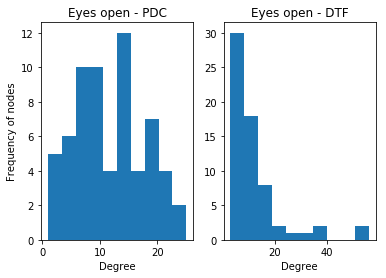

In [44]:
################### 2.5
### degree
## PDC 
plt.subplot(1,2,1)
values=[]
for x in list(G_eo_pdc.degree):
    values.append(x[1])
plt.hist(values)
plt.xlabel('Degree')
plt.ylabel('Frequency of nodes')
plt.title('Eyes open - PDC')

##  DTF 
plt.subplot(1,2,2)
values=[]
for x in list(G_eo_dtf.degree):
    values.append(x[1])
plt.hist(values)
plt.xlabel('Degree')
#plt.ylabel('Frequency of nodes')
plt.title('Eyes open - DTF')

plt.show()

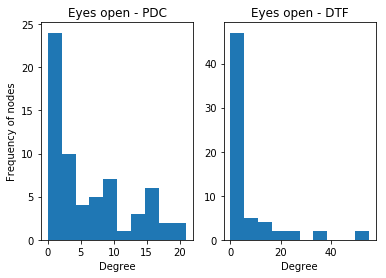

In [48]:
### in_degree
## PDC 
plt.subplot(1,2,1)
values=[]
for x in list(G_eo_pdc_dir.in_degree):
    values.append(x[1])
plt.hist(values)
plt.xlabel('Degree')
plt.ylabel('Frequency of nodes')
plt.title('Eyes open - PDC')

##  DTF 
plt.subplot(1,2,2)
values=[]
for x in list(G_eo_dtf_dir.in_degree):
    values.append(x[1])
plt.hist(values)
plt.xlabel('Degree')
#plt.ylabel('Frequency of nodes')
plt.title('Eyes open - DTF')

plt.show()

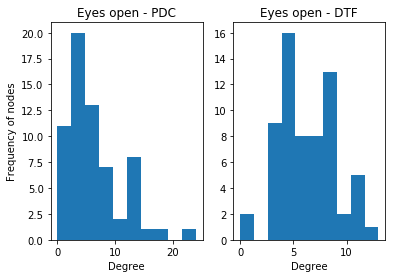

In [49]:
### out_degree
## PDC 
plt.subplot(1,2,1)
values=[]
for x in list(G_eo_pdc_dir.out_degree):
    values.append(x[1])
plt.hist(values)
plt.xlabel('Degree')
plt.ylabel('Frequency of nodes')
plt.title('Eyes open - PDC')

##  DTF 
plt.subplot(1,2,2)
values=[]
for x in list(G_eo_dtf_dir.out_degree):
    values.append(x[1])
plt.hist(values)
plt.xlabel('Degree')
#plt.ylabel('Frequency of nodes')
plt.title('Eyes open - DTF')

plt.show()

In [ ]:
################### 2.4

In [70]:
def global_indeces(graph_names_lst):
    global_cc = []
    avg_path = []
    for g in graph_names_lst:

        adj = np.load('networks/' + g + '.npy')
        G =nx.from_numpy_matrix(adj)

        global_cc.append(nx.average_clustering(G))
        avg_path.append(nx.average_shortest_path_length(G))
    return(global_cc, avg_path)

In [95]:
## 5 e 10 non sono connessi
lst = ['eo_pdc_20', 'eo_pdc_30', 'eo_pdc_50']
densities = [20,30,50]
global_cc = global_indeces(lst)[0]
avg_path = global_indeces(lst)[1]

In [96]:
global_cc

[0.4134001172090817, 0.4672644879623422, 0.5878254718958065]

In [97]:
avg_path

[2.079861111111111, 1.8090277777777777, 1.568452380952381]

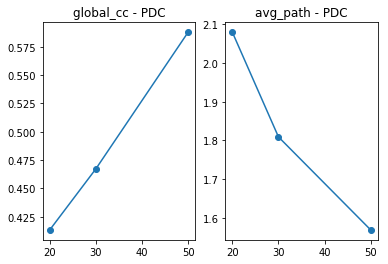

In [104]:
plt.subplot(1,2,1)
plt.plot(densities, global_cc, 'o-')
plt.title('global_cc - PDC')

plt.subplot(1,2,2)
plt.plot(densities, avg_path, 'o-')
plt.title('avg_path - PDC')
plt.show()